## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

## Exploratory Data Analysis (EDA)

### Loading data into a dataframe

In [2]:
df = pd.read_csv("Datasets/dialect_dataset.csv", header=0)
df.sample(10)

,text,dialect
398782,😂😂😂 يا جماعة الولد دا لزيز والله https://t.co/...,SD
40613,الايام هذي لما نبي نضحك ✌🏻 https://t.co/1uR4o9...,LY
320797,@Hass4n_ @AbdllahAlneaimi و هوي بتلاقيه بيخاف ...,LB
308935,بالرغم من الاختلاف مع القوات التاريخي ، ومش دف...,LB
249786,@rehamn2013 مجدى عبد الغنى اتمرقع,EG
353788,@KUWTIYA اوف.... لو طاقه طراق احسن,KW
227688,اش اخر مانجا تابعتيها أو الانمي ؟ \n@Arwa_q...,YE
426750,@SamiGargash وياكم ان شاء الله بو عبدالله 💐,AE
69209,@h90aaa @ahmad_alsulaiti @khalidjassem74 الله ...,QA
123852,@Ncinema_word @Yacoub_Shaheen @FadiHaddadmedia...,PL


### General statistics

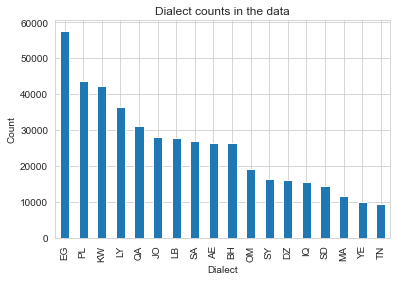

In [3]:
df["dialect"].value_counts().plot(kind='bar',
                                  title= "Dialect counts in the data",
                                  xlabel= 'Dialect',
                                  ylabel= 'Count');

- There are 18 different dialects (labels) in the dataset.
- The total number of rows in the dataset is 458197.
- The labels distribution is imbalanced. 
- The most represented dialect is 'EG' with around 57,000 rows. 
- The least represeneted dialects are 'YE' and 'TN' with around 10,000 rows and 9,200 respectively.

### Tweets length distribution per dialect

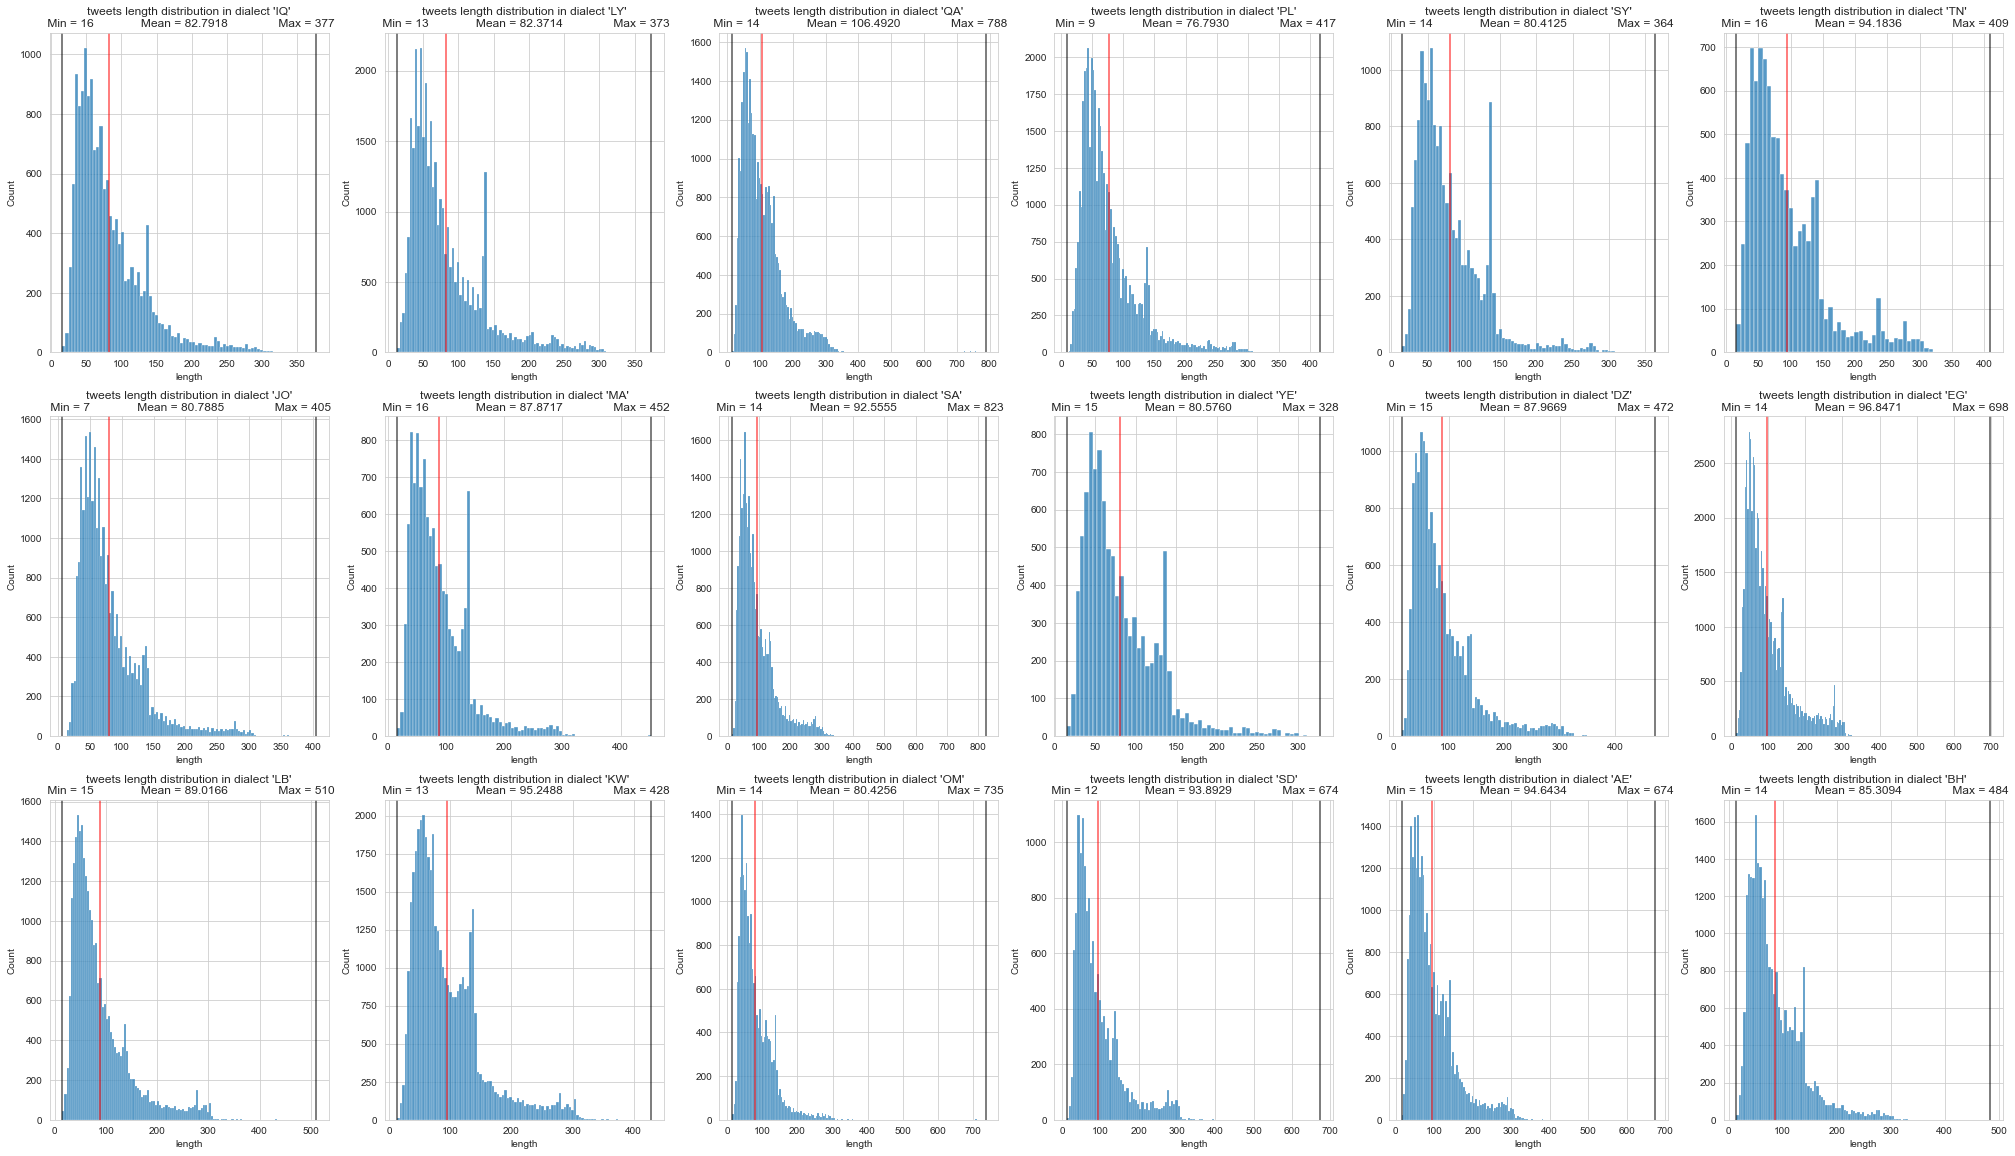

In [4]:
df["length"] = df["text"].apply(len)
dialects = df["dialect"].unique()

fig, axes = plt.subplots(3,6, figsize=(35,20))
for dialect, ax in zip(dialects, axes.flatten()):
    dialect_data = df[df['dialect'] == dialect]
    minimum = dialect_data['length'].min()
    maximum = dialect_data['length'].max()
    mean = dialect_data['length'].mean()
    sns.histplot(data = dialect_data["length"], ax=ax)
    ax.set_title(f"tweets length distribution in dialect '{dialect}'\n Min = {minimum}              Mean = {mean:.4f}               Max = {maximum}")
    ax.axvline(minimum, color ='black', lw=2, alpha=0.5)
    ax.axvline(maximum, color ='black', lw=2, alpha=0.5)
    ax.axvline(mean, color ='red', lw=2, alpha=0.5)

plt.show()

- All dialects have a somewhat similar tweet-length distribution.

### Mentions, URLs, and Hashtags

In [5]:
print("total number of tweets =", len(df))

print("percentage of tweets that contains URLs =", len(df[df["text"].str.contains(r"https?\://\S+")]))
print("percentage of tweets that contains hashtags =", len(df[df["text"].str.contains(r"#\S+")]))
print("percentage of tweets that contains mentions, URLs, or hashtags =", len(df[df["text"].str.contains(r"(?:\@|https?\://|#)\S+")]))

total number of tweets = 458197
percentage of tweets that contains URLs = 68195
percentage of tweets that contains hashtags = 44122
percentage of tweets that contains mentions, URLs, or hashtags = 373189


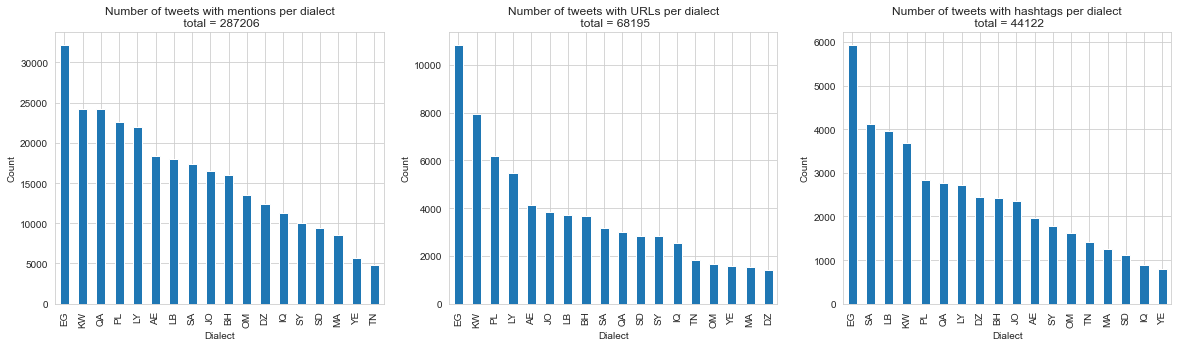

In [7]:
dic = {"mentions": r"\@\S+", 
       "URLs": r"https?\://\S+", 
       "hashtags": r"#\S+"}
fig , axes = plt.subplots(1,3, figsize=(20,5))

for i, ax in zip(dic.keys(), axes):
    selected_df = df[df["text"].str.contains(dic[i])]
    selected_df["dialect"].value_counts().plot(kind = 'bar',
                                               title = f"Number of tweets with {i} per dialect\n total = {len(selected_df)}",
                                               xlabel = 'Dialect',
                                               ylabel = 'Count',
                                               ax = ax);